<a href="https://colab.research.google.com/github/ManaswithaAkkamgari/AIML_Project_and_Lab/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [25]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [26]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [27]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [28]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

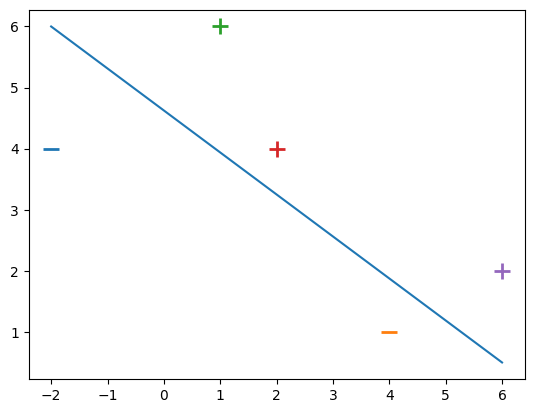

In [29]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

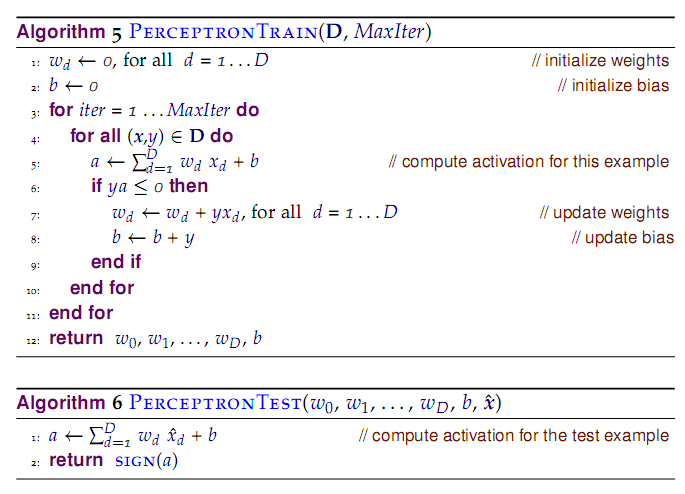

The algorithm is shown in the above image.

In [30]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [31]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

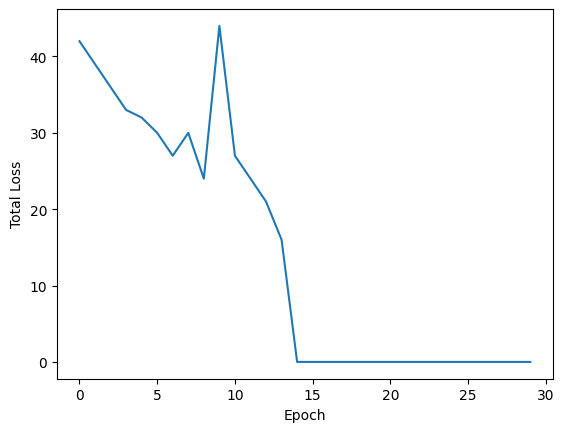

In [32]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

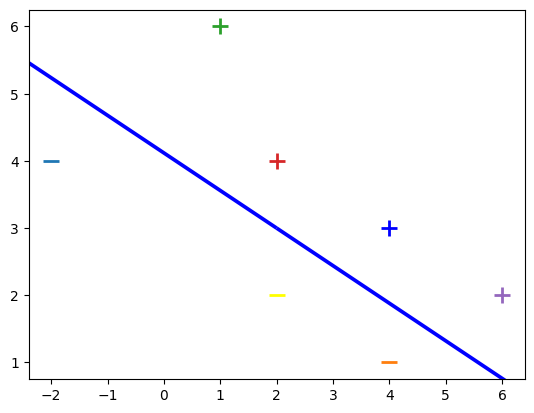

In [33]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



**1) Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.**

[-2.  3. 15.]
Epoch 1/50 → Misclassifications: 9
Epoch 2/50 → Misclassifications: 10
Epoch 3/50 → Misclassifications: 9
Epoch 4/50 → Misclassifications: 9
Epoch 5/50 → Misclassifications: 12
Epoch 6/50 → Misclassifications: 11
Epoch 7/50 → Misclassifications: 9
Epoch 8/50 → Misclassifications: 6
Epoch 9/50 → Misclassifications: 8
Epoch 10/50 → Misclassifications: 7
Epoch 11/50 → Misclassifications: 9
Epoch 12/50 → Misclassifications: 11
Epoch 13/50 → Misclassifications: 8
Epoch 14/50 → Misclassifications: 10
Epoch 15/50 → Misclassifications: 10
Epoch 16/50 → Misclassifications: 13
Epoch 17/50 → Misclassifications: 9
Epoch 18/50 → Misclassifications: 7
Epoch 19/50 → Misclassifications: 9
Epoch 20/50 → Misclassifications: 10
Epoch 21/50 → Misclassifications: 8
Epoch 22/50 → Misclassifications: 9
Epoch 23/50 → Misclassifications: 10
Epoch 24/50 → Misclassifications: 9
Epoch 25/50 → Misclassifications: 9
Epoch 26/50 → Misclassifications: 11
Epoch 27/50 → Misclassifications: 11
Epoch 28/50 

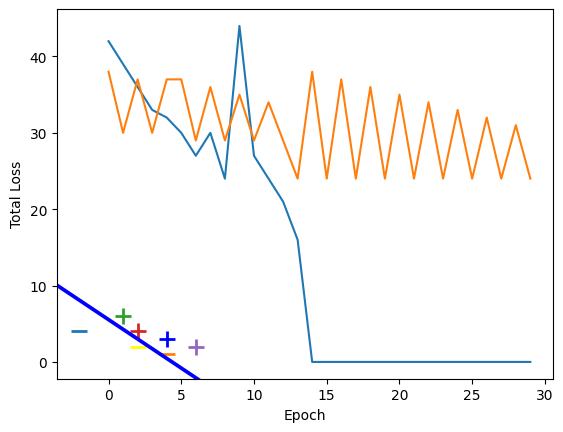

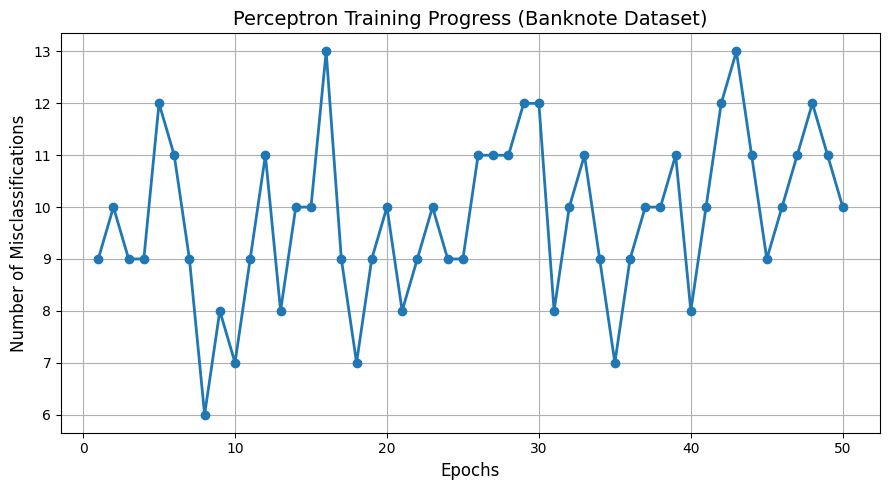

In [34]:
import numpy as np
from matplotlib import pyplot as plt

# Initial toy dataset with bias term
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, 1, 1])

def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10
    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

def perceptron_algo_plot(X, Y):
    '''
    Train perceptron and plot the total loss in each epoch.
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    return w

# Example usage
w = perceptron_algo_plot(X, y)

# Plotting classified samples and decision boundary
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]
x2x3 = np.array([x2, x3])
Xq, Yq, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(Xq, Yq, U, V, scale=1, color='blue')

# Example for non-linearly separable data
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y = np.array([-1, -1, 1, -1, -1])
print(perceptron_algo_plot(X, y))

# Functions for real dataset (e.g., Banknote Authentication)
from sklearn.preprocessing import StandardScaler

def load_and_prepare_data(filepath):
    data = np.loadtxt(filepath, delimiter=',')
    X = data[:, :-1]
    y = np.where(data[:, -1] == 0, -1, 1) # convert 0 → -1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    bias = -1 * np.ones((X_scaled.shape[0], 1))
    X_bias = np.hstack((X_scaled, bias))
    return X_bias, y

def perceptron_train(X, y, epochs=50, lr=0.01):
    weights = np.zeros(X.shape[1])
    errors_per_epoch = []
    for epoch in range(epochs):
        total_errors = 0
        for xi, target in zip(X, y):
            activation = np.dot(xi, weights)
            prediction = 1 if activation >= 0 else -1
            if prediction != target:
                weights += lr * target * xi
                total_errors += 1
        errors_per_epoch.append(total_errors)
        print(f"Epoch {epoch+1}/{epochs} → Misclassifications: {total_errors}")
    return weights, errors_per_epoch

def plot_errors(errors):
    plt.figure(figsize=(9, 5))
    plt.plot(range(1, len(errors)+1), errors, marker='o', linestyle='-', linewidth=2)
    plt.title('Perceptron Training Progress (Banknote Dataset)', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Number of Misclassifications', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example real-data usage:
X, y = load_and_prepare_data('data_banknote_authentication.txt')
weights, errors = perceptron_train(X, y, epochs=50, lr=0.01)
plot_errors(errors)


**2) Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?**

 **Impact of Learning Rate on Perceptron Training:-**

The *learning rate* determines how much the perceptron changes its weights in response to errors:

- **Low learning rate** (like 0.001): Updates are very small, so training takes more epochs to reach a solution—progress is gradual but steady.
- **High learning rate** (like 10): Updates are very large, which can make the weights oscillate or even fail to stabilize—the model may never settle on a solution.
- **Intermediate learning rate** (like 0.1): Typically leads to efficient, reliable learning—the model reaches the right weights in less time, with minimal oscillation.



**3) Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.**

When you take a toy dataset that is **not linearly separable** (for example, some of the positive samples and negative samples are mixed in such a way that no straight line can perfectly split them), and run the perceptron algorithm on it, the following is observed:

- **The perceptron algorithm fails to converge**. Instead of settling on a fixed set of weights, it keeps updating them because there will always be misclassifications—there is no way to find a perfect separating hyperplane.
- The training error (number of misclassified samples or total loss per epoch) **never reaches zero**. Instead, the pattern of errors may repeat or oscillate after some point, or the same set of weights can appear multiple times during training.
- In your attached example, the code shows this phenomenon: when run on a non-linearly separable dataset, the perceptron cycles through weight updates, and the training error ("total loss" or misclassifications) never fully vanishes.

**Observation:**  
> “If the training data is not linearly separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.”



In [35]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [36]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


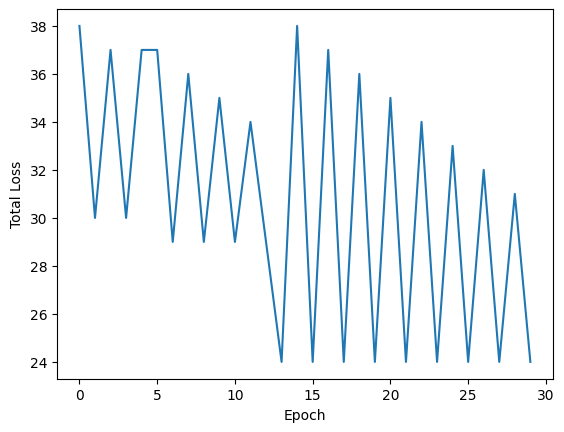

In [37]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1) Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.



# Answer:
**Yes, the AND dataset is learnable by a Perceptron.**  
The AND function is linearly separable; you can draw a straight line to separate the positive class (only (1,1)) from the negative ones.

#### Perceptron Weight Update Procedure (starting from w = , b = 0):

Let’s use $$ y \in \{-1, +1\} $$, learning rate η = 1, and convert outputs: “+” = +1, “−” = −1.

| x₁ | x₂ | y  |
|----|----|----|
| 0  | 0  | −1 |
| 0  | 1  | −1 |
| 1  | 0  | −1 |
| 1  | 1  | +1 |

Weights: w = [w₁, w₂], bias = b.

**Epoch 1:**

- (0,0), y=−1: activation = 0, pred=+1 → wrong, update: w=, b=−1
- (0,1), y=−1: activation = 0 + 0 + (−1) = −1, pred=−1 → correct, no update
- (1,0), y=−1: activation = 0 + 0 + (−1) = −1, pred=−1 → correct, no update
- (1,1), y=+1: activation = 0 + 0 + (−1) = −1, pred=−1 → wrong, update: w=[1][1], b=0

**Epoch 2:**

- (0,0), y=−1: activation = 0, pred=+1 → wrong, update: w=[1][1], b=−1
- (0,1), y=−1: activation = 0 + 1 + (−1)=0, pred=+1 → wrong, update: w=[1], b=−2
- (1,0), y=−1: activation = 1 + 0 + (−2)=−1, pred=−1 → correct, no update
- (1,1), y=+1: activation = 1 + 0 + (−2)=−1, pred=−1 → wrong, update: w=[1], b=−1



2)Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

# Answer:

There are $$ 2^{2^2} = 16 $$ possible Boolean functions over 2 bits. **Exactly 14 are linearly separable** and therefore learnable by a Perceptron.

#### The Two NOT Learnable Functions (i.e., Not Linearly Separable):

- **XOR**
- **XNOR** (Equivalence)

#### Truth Tables:

| x₁ | x₂ | XOR | XNOR |
|----|----|-----|------|
| 0  | 0  |  −  |  +   |
| 0  | 1  |  +  |  −   |
| 1  | 0  |  +  |  −   |
| 1  | 1  |  −  |  +   |


